In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dask.array as da
import zarr as zr
import xarray as xr
import django
from dask.distributed import Client, progress

import dask_image.ndfilters

django.setup()
from bioconverter.models import Representation
from filters.models import Filtering

Debugging build
Hosting on:  localhost
['129.206.5.200', '127.0.0.1', 'localhost', 'johannesroos.de', '129.206.173.171', '192.168.0.116', '192.168.137.1', '192.168.99.100', 'web', 'localhost']


In [2]:
prewitt = Filtering.objects.last()

In [3]:
prewitt

In [4]:
rep = prewitt.representation

In [9]:
rep.biometa.channels

AttributeError: 'DataArray' object has no attribute 'biometa'

In [28]:
it = array
prewx = dask_image.ndfilters.prewitt(it.data, axis=0)
prewy = dask_image.ndfilters.prewitt(it.data, axis=1)

prewittfiltered = da.sqrt(prewx*prewx + prewy*prewy)

In [29]:
def prepend(el, string= "Prewitt of"):
    items = el.channels.data.compute()
    for merge in items:
        merge["Name"] = f"{string} {merge['Name']}"
    return items

In [30]:
c = prepend(it, string="Prewitt of")

In [31]:
channels = xr.DataArray(da.array(c), dims="c")

In [32]:
x = xr.DataArray(prewittfiltered, dims=it.dims, coords={ **it.coords, "channels": channels})

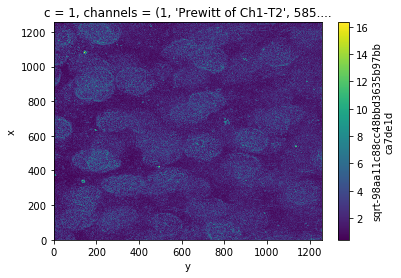

In [33]:
x.sel(c=1).max(dim="z").sel(t=0).plot.imshow()